# Monte Carlo Integration

We frequently have the need to compute definite integrals

$$ \int^a_b f(x) dx $$

of a given function $f$. But for many functions, it is impossible to write down an an anti-derivative in closed form. In such cases, we may use numerical integration to approximate the definite integral.


In this project, I am going to present Monte Carlo Integration, which is a statistical method based on random sampling. The term Monte Carlo is used to refer to techniques involving computer simulation and Monte Carlo integration is numerical integration using simulation. We can approximate univariate and multidimensional integrals by taking advantage of the availability of computer-generated random variables. The idea of random sampling has been widely used to study the distribution of complex statistics.




First, we set up basic settings and load a few packages. We also set up our target function for integration.
The function I chose is 

$$ f(x) = \frac{3}{4} x^4 e^{-x^{\frac{3}{4}}} $$.

And I wish to find its integral between $[0,10]$.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

sns.set_style('white')
sns.set_context('talk')

def hard_function(x):
    return((3/4)*(x**4)*np.exp(-x**(3/4)))

    

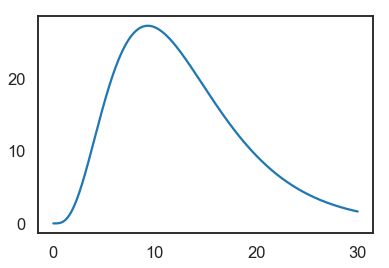

In [30]:
X=np.linspace(0,30,10000)
plt.plot(X,hard_function(X))
plt.show()


In this method, we generate a uniform random variable between our region of intrgration. By checking if the points is under the function curve, we may calculate the probability that the point falls into the area of our target function. Then multiply the probability and the area volumn, we may approximate the desired integral.

In [28]:
def integrate(x1,x2,func=hard_function,n=100000):
    X=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(X)))+1
    #print(x1,x2,y1,y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    #print(np.mean(check))
    return(np.mean(check)*area,xs,ys,check)


print(integrate(0,10,hard_function)[0])


148.89645437034173


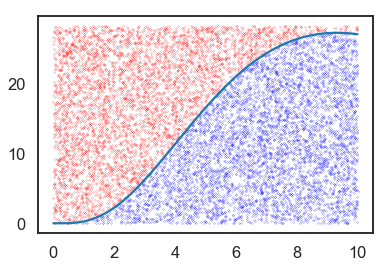

In [29]:
_,x,y,c=integrate(0,10,hard_function,n=10000)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(0,10,10000)
plt.plot(X,hard_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red',s=0.05)
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue',s=0.05)
plt.show()


In this case, we estimated

$$ \int^{10}_{0} f(x) dx = 148.9106039906373 $$

Compare to the answer calculated by wolfram alpha, which is 149.237, we can see the solutions are close, and may be more precise if we make n larger.